# SIR model on 2 Cities with population Migration

## Parameters

- ### City 1
    -  S_1 Susceptible Individuals
    -  I_1 Infected Individuals
    -  R_1 Recovered Individuals
    -  $N_{1}$ Total Population of City 1
- ### City 2
    -  S_2 Susceptible Individuals
    -  I_2 Infected Individuals
    -  R_2 Recovered Individuals
    -  $N_{2}$ Total Population of City 2
- $\beta_{1}$ Transmission Rate of Infection in City 1
- $\beta_{2}$ Transmission Rate of Infection in City 2
- $\beta$ can be different since they can depend upon the network of people inside the cities
- $\gamma_{1}$ Recovery rate in City 1
- $\gamma_{2}$ Recovery rate in City 2
- Note: $\gamma_{1}$ and $\gamma_{2}$ cannot be different for different cities as it depends on the disease
- $\mu$ Rate of Birth and Death
- $\omega$ Pathogen induced mortality rate
- $\zeta_{1,2}$ Migration rate from  $1 \rightarrow 2$
- $\zeta_{2,1}$ Migration rate from $2 \rightarrow 1$
- $\alpha$ The Probability that the infection comes from outside the system

## Assumptions

- We assume that if a person migrates then, he/she doesnot undergo death or give birth

## Equations 
### City 1

#### Susceptible 
$$\frac{dS_{1}}{dt}=\mu( N_{1} - S_{1}) - \beta_{1} S_{1}(I_{1}+\zeta_{2,1} I_{2}) + \zeta_{2,1} S_{2} -\zeta_{1,2} S_{1} - \alpha S_{1}$$

#### Infected
$$\frac{dI_{1}}{dt}=\alpha S_{1}+ \beta_{1} S_{1}(I_{1}+\zeta_{2,1}I_{2}) -(\mu+\omega)I_{1} - \gamma I_{1} + \zeta_{2,1}I_{2} - \zeta_{1,2} I_{1}$$

#### Recovered
$$\frac{dR_{1}}{dt}= \gamma I_{1} -\mu R_{1} + \zeta_{2,1} R_{2} - \zeta_{1,2} R_{1} $$

### City 2

#### Susceptible 
$$\frac{dS_{2}}{dt}=\mu( N_{2} - S_{2}) - \beta_{2} S_{2}(I_{2}+\zeta_{1,2} I_{1}) + \zeta_{1,2} S_{1} -\zeta_{2,1} S_{2} - \alpha S_{2}$$

#### Infected
$$\frac{dI_{2}}{dt}= \alpha S_{2}+ \beta_{2} S_{2}(I_{2}+\zeta_{1,2}I_{1}) -(\mu+\omega)I_{2} - \gamma I_{2} + \zeta_{1,2}I_{1} - \zeta_{2,1} I_{2}$$

#### Recovered
$$\frac{dR_{2}}{dt}= \gamma I_{2} -\mu R_{2} + \zeta_{1,2} R_{1} -\zeta_{2,1} R_{2} $$

### Constraint Equations (Does not matter for Stochastic Model)

$$N_{1}=S_{1}+I_{1}+R_{1},N_{2}=S_{2}+I_{2}+R_{2}$$

$$\frac{dN_{1}}{dt}+\frac{dN_{2}}{dt}= 0$$

$$\frac{dN_{1}}{dt}=\zeta_{2,1} N_{2} - \zeta_{1,2} N_{1}$$

<span style="color:Blue">To do:</span> The Constraint equation is not satisfied $-\omega(I_{1}+I_{2})$ term remains.
<span style="color:Blue">Ans:</span> The constraint equation are not supposed to be satisfied since the model is stochastic 

# Simulating the above the Model

In [1]:
from __future__ import division
import numpy
import random 
import matplotlib.pyplot as plt
%matplotlib inline

## Fill up the parameters required for the simulation 

In [2]:
N1 = 80
N2 = 80
mu = 0
beta1 = 2
beta2 = 2
gamma1 = 0.02
gamma2 = gamma1
omega = 0
tr12 = 0.1
tr21 = 0.1
tmax = 100
alpha = 0.0001

Number of events =  1942


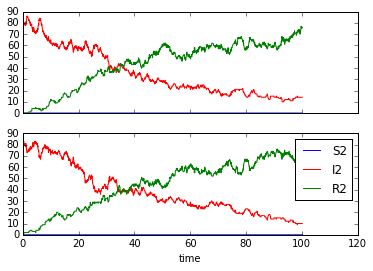

In [3]:
MAX=int(1e6)
TVal=numpy.zeros(MAX,dtype=float)
S1Val=numpy.zeros(MAX,dtype=int)
I1Val=numpy.zeros(MAX,dtype=int)
R1Val=numpy.zeros(MAX,dtype=int)
S2Val=numpy.zeros(MAX,dtype=int)
I2Val=numpy.zeros(MAX,dtype=int)
R2Val=numpy.zeros(MAX,dtype=int)

'''print "Ro of city1", beta1/gamma1
print "Ro of city2", beta2/gamma2
avgbeta=numpy.average([beta1,beta2])
print "Combined Ro using the hypothesised formula", avgbeta/gamma1*(1-numpy.var([beta1,beta2])) '''

#------------Initial Values-----------------------
count = 0
t = 0

I1    = 1
R1    = 0
S1    = N1-I1
I2    = 1
R2    = 0
S2    = N2

TVal[count]=t
S1Val[count]=S1
I1Val[count]=I1
R1Val[count]=R1
S2Val[count]=S2
I2Val[count]=I2
R2Val[count]=R2

while count < MAX and t < tmax and I1>=0 and I2>=0:
    Rate_S12I1 = beta1*S1*(I1+tr21*I2)+alpha*S1 
    Rate_I12R1 = gamma1*(I1+tr21*I2) 
    Rate_S22I2 = beta2*S2*(I2+tr12*I1)+alpha*S2
    Rate_I22R2 = gamma2*(I1+tr12*I1)
    Rate_S22S1 = tr21*S2
    Rate_I22I1 = tr21*I2
    Rate_R22R1 = tr21*R2
    Rate_S12S2 = tr12*S1
    Rate_I12I2 = tr12*I1
    Rate_R12R2 = tr12*R1
    Birth_1    = mu*(S1+I1+R1)
    Birth_2    = mu*(S2+I2+R2)
    Death_S1   = mu*S1
    Death_S2   = mu*S2
    Death_I1   = (mu+omega)*I1
    Death_I2   = (mu+omega)*I2
    Death_R1   = mu*R1
    Death_R2   = mu*R2
    
    K  = Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2+Birth_1+Birth_2+Death_S1+Death_S2+Death_I1+Death_I2+Death_R1+Death_R2

    
    dt=-(1.0/K)*numpy.log(random.random())
    
    t = t + dt
    count = count + 1
    
    r= random.random()*K
    
    if r < Rate_S12I1:
        S1 -= 1
        I1 += 1
    elif r < Rate_S12I1+Rate_I12R1:
        I1 -= 1
        R1 += 1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2:
        S2 -= 1
        I2 += 1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2:
        I2 -= 1
        R2 += 1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1:
        S2 -= 1
        S1 += 1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1:
        I2 -= 1
        I1 += 1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1:
        R2 -= 1
        R1 += 1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2:
        S1 -= 1
        S2 += 1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2:
        I1 -= 1
        I2 += 1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2:
        R1 -= 1
        R2 += 1    
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2+Birth_1:
        S1 += 1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2+Birth_1+Birth_2:
        S2 +=1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2+Birth_1+Birth_2+Death_S1:
        S1 -=1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2+Birth_1+Birth_2+Death_S1+Death_S2:
        S2 -=1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2+Birth_1+Birth_2+Death_S1+Death_S2+Death_I1:
        I1 -=1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2+Birth_1+Birth_2+Death_S1+Death_S2+Death_I1+Death_I2:
        I2 -=1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2+Birth_1+Birth_2+Death_S1+Death_S2+Death_I1+Death_I2+Death_R1:
        R1 -=1
    elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2+Birth_1+Birth_2+Death_S1+Death_S2+Death_I1+Death_I2+Death_R1+Death_R2:
        R2 -=1
    TVal[count]=t
    S1Val[count]=S1
    I1Val[count]=I1
    R1Val[count]=R1
    S2Val[count]=S2
    I2Val[count]=I2
    R2Val[count]=R2
TVal=TVal[:count+1]
S1Val=S1Val[:count+1]
I1Val=I1Val[:count+1]
R1Val=R1Val[:count+1]
S2Val=S2Val[:count+1]
I2Val=I2Val[:count+1]
R2Val=R2Val[:count+1]

print 'Number of events = ',count
#-------------------------------------------#
fig,ax = plt.subplots(2,sharex=True)
ax[0].plot(TVal,S1Val,'b-',label='S1')
ax[0].plot(TVal,I1Val,'r-',label='I1')
ax[0].plot(TVal,R1Val,'g-',label='R1')
ax[1].plot(TVal,S2Val,'b-',label='S2')
ax[1].plot(TVal,I2Val,'r-',label='I2')
ax[1].plot(TVal,R2Val,'g-',label='R2')
ax[1].set_xlabel('time')
ax[1].legend(loc='best')
plt.show()    

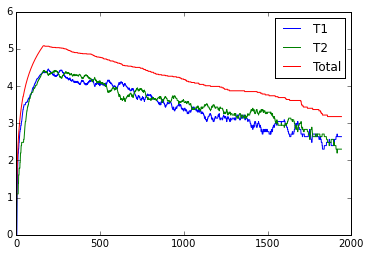

In [4]:
t1ser=I1Val[:count]
t2ser=I2Val[:count]
tot=t1ser+t2ser
fig,ax = plt.subplots()
ax.plot(numpy.log(t1ser),label='T1')
ax.plot(numpy.log(t2ser),label='T2')
ax.plot(numpy.log(tot),label='Total')
ax.legend(loc='best')
plt.show()

In [5]:
import r0

In [27]:
#Averages over all windows 2,3,4,5
def r_o_t(series,parts=50):
    r_x=[]
    #c_c=[]
    for i in [2,3,4,5]: #window moving average sizes
        (r,cor,p)=r0.r0(series,i,gamma2,parts)
        fig,ax = plt.subplots(1,2,sharey=True)
        ax[0].plot(cor,r,'-o',label=str(i))
        ax[1].plot(p,r,'-o',label=str(i))
        ax[0].set_ylabel("Ro value")
        ax[0].set_xlabel("Correlation Coefficient")
        ax[1].set_xlabel("P value")
        #------------Choosing the appropriate r value----------------------
        p=numpy.array(p)
        cor=numpy.array(cor)
        p_new=1/p
        p_nor=(p_new-numpy.nanmin(p_new))/(numpy.nanmax(p_new)-numpy.nanmin(p_new))
        cor_nor=(cor-numpy.nanmin(cor))/(numpy.nanmax(cor)-numpy.nanmin(cor))
        new_metr=cor_nor+p_nor
        ind=numpy.nanargmax(new_metr)
        r_x.append(r[ind])
        ax[1].legend(loc='best')
    plt.plot()
    print r_x
    return numpy.nanmean(r_x)

Choose your parts based on this 193
[1.5112419351288933]
Choose your parts based on this 168
[1.4400609708427781]
Choose your parts based on this 165
[1.3467679948323674]
Choose your parts based on this 193
[1.5661782251299976]
Choose your parts based on this 168
[1.4381451731535146]
Choose your parts based on this 165
[1.3599073273979003]
Choose your parts based on this 193
[1.5537152884953729]
Choose your parts based on this 168
[1.4451682312859415]
Choose your parts based on this 165
[1.374352199042937]
Choose your parts based on this 193
[1.5369694703225143]
Choose your parts based on this 168
[1.4345036790877201]
Choose your parts based on this 165
[1.3871805474304344]
Choose your parts based on this 193
[1.5185587253627308]
Choose your parts based on this 168
[1.4335703746917372]
Choose your parts based on this 165
[1.4047409504823809]
Choose your parts based on this 193
[1.4979640279591537]
Choose your parts based on this 168
[1.4265784726262074]
Choose your parts based on this 

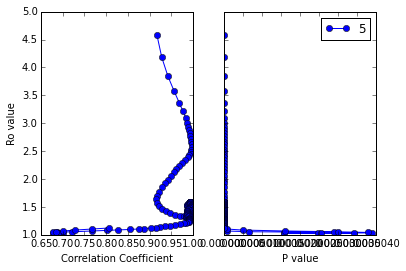

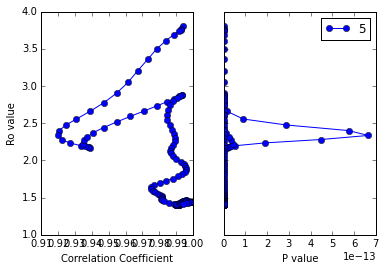

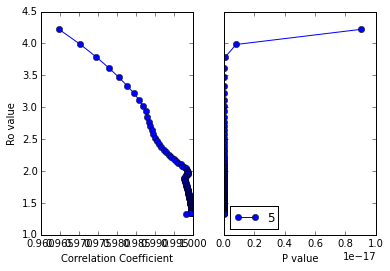

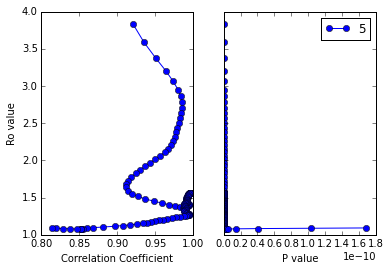

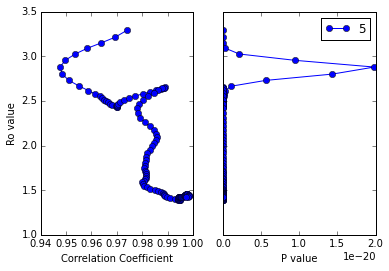

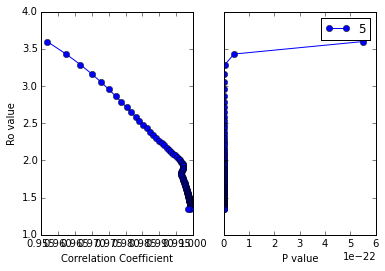

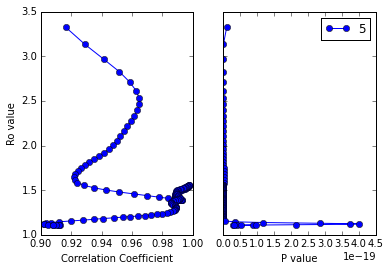

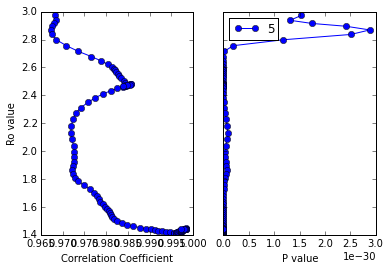

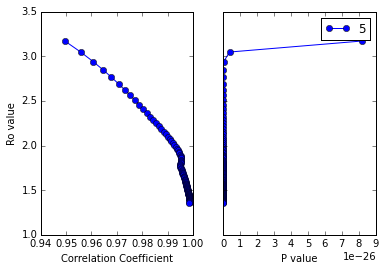

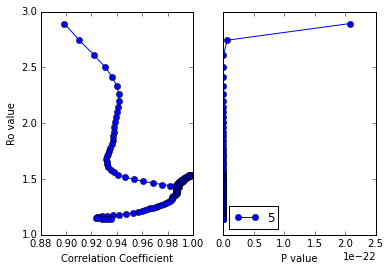

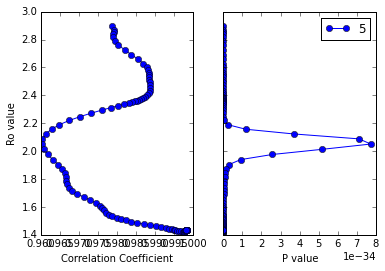

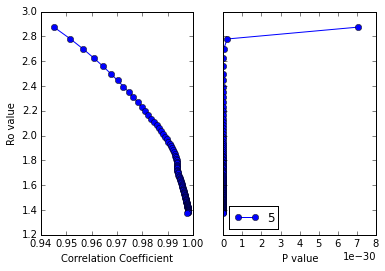

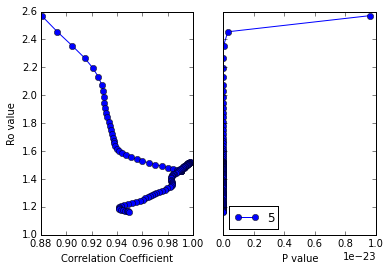

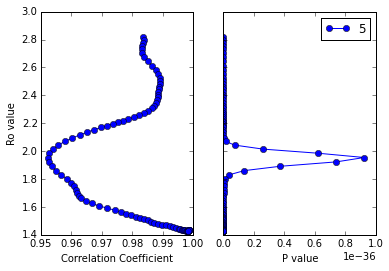

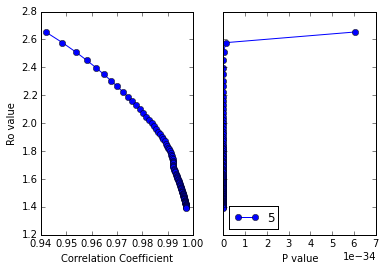

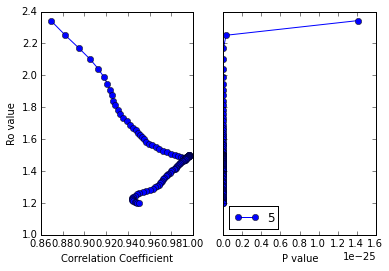

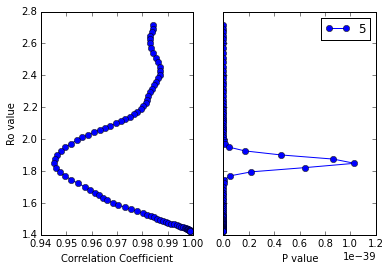

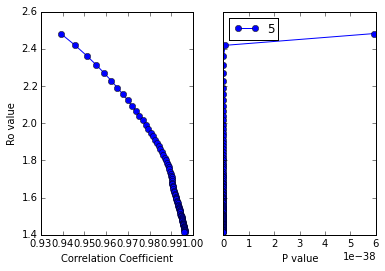

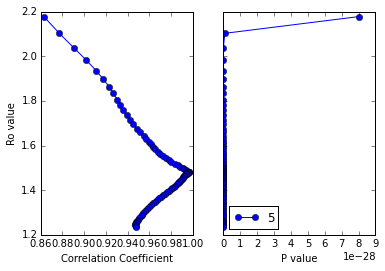

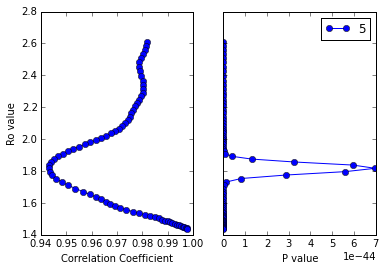

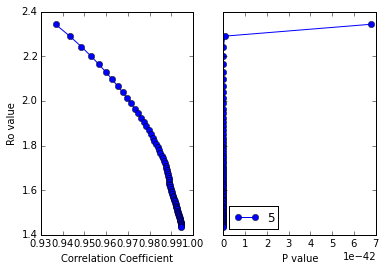

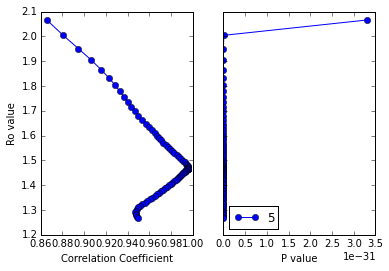

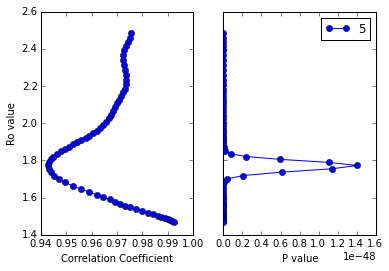

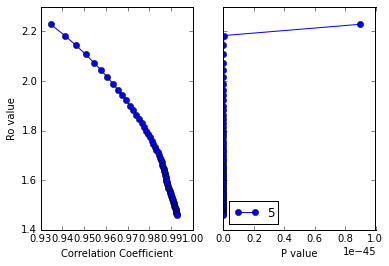

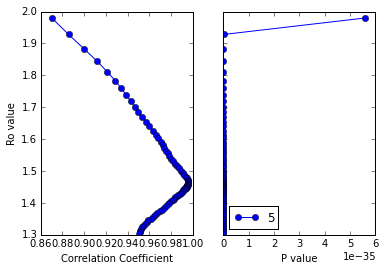

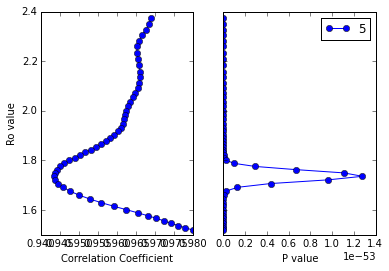

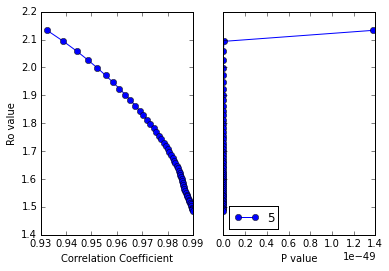

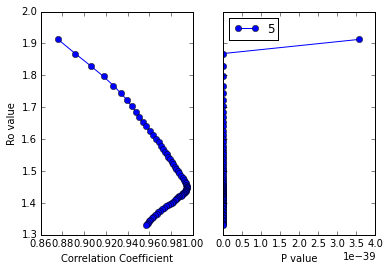

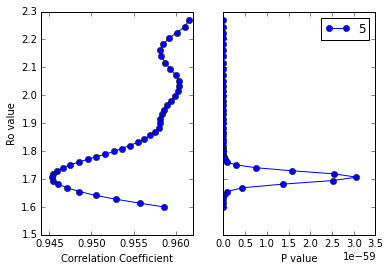

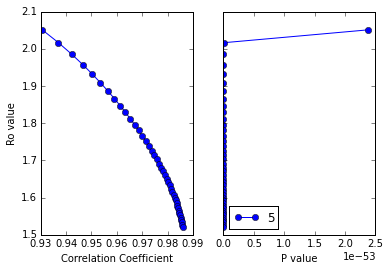

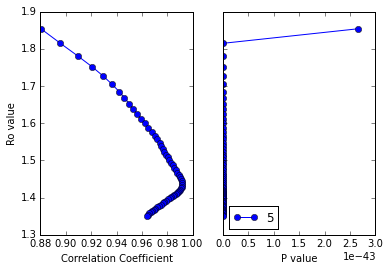

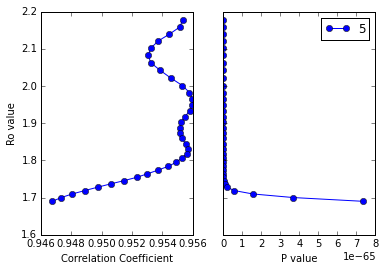

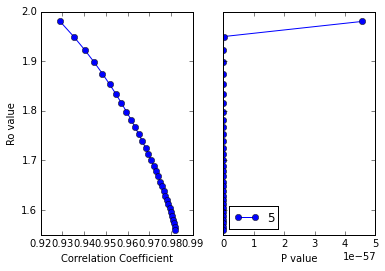

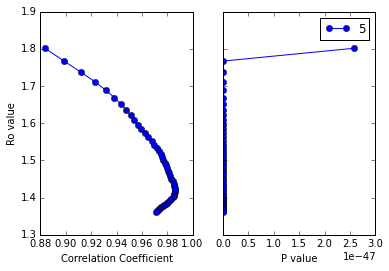

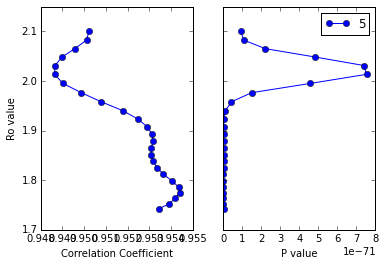

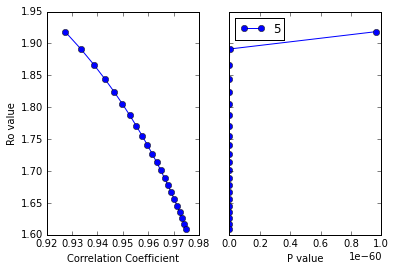

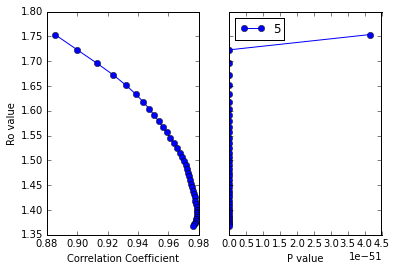

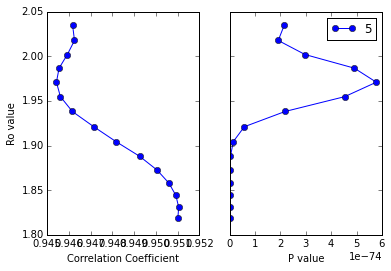

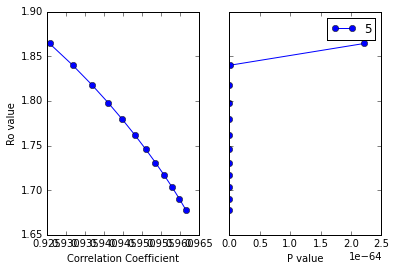

In [28]:
t1=[]
t2=[]
to=[]
for i in [30,40,50,60,70,80,90,100,110,120,130,140,150]:
    z=(r_o_t(t1ser,i),r_o_t(t2ser,i),r_o_t(tot,i))
    t1.append(z[0])
    t2.append(z[1])
    to.append(z[2])
#r_o_t(tot)
#print z


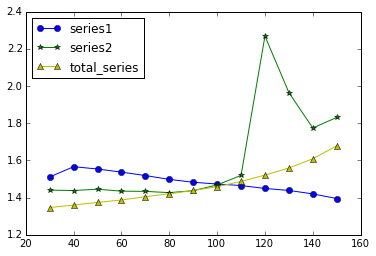

In [29]:
plt.plot([30,40,50,60,70,80,90,100,110,120,130,140,150],t1,'b-o',label='series1')
plt.plot([30,40,50,60,70,80,90,100,110,120,130,140,150],t2,'g-*',label='series2')
plt.plot([30,40,50,60,70,80,90,100,110,120,130,140,150],to,'y-^',label='total_series')
plt.legend(loc='best')

In [25]:
def Mean(z):
    return (z[0]+z[1])/2
def Max(z):
    return max(z[0],z[1])
def X(z):
    return abs(z[0]-z[1])

In [26]:
me=[]
ma=[]
Xax=[]
y=[]

In [146]:
me.append(Mean(z))
ma.append(Max(z))
Xax.append(X(z))
y.append(z[2])

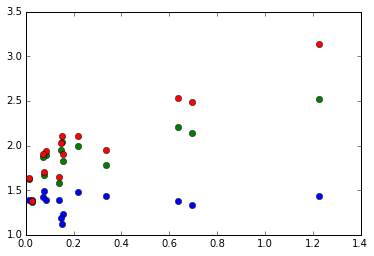

In [147]:
plt.plot(Xax,y,'bo')
plt.plot(Xax,me,'go')
plt.plot(Xax,ma,'ro')

# Calculating $R_{0}$ more into version(Not to run, unless you know what u are doing)

In [28]:
file=open("series1.csv",'w')
for i in t1ser:
    file.write(str(i)+',')
file.close()

In [ ]:
file=open("series2.csv",'w')
for i in t2ser:
    file.write(str(i)+',')
file.close()

In [ ]:
file=open("seriestot.csv",'w')
for i in gh:
    file.write(str(i)+',')
file.close()

# Calculating the Error in the Estimation of $R_{0}$ using bootstraping

In [ ]:
count=0
b=[]
while count<100:
    series=numpy.random.choice(t1ser[:60],len(t1ser[:60]),replace=True)
    mean=[]
    for i in range(15,50):
        mean.append(r_o_t(i,series))
    b.append(numpy.nanmean(mean))
    count += 1
    #print count
print numpy.nanmean(b)

In [ ]:
b=numpy.array(b)
plt.hist(b[~numpy.isnan(b)])